# **Face Recognition Thresholds**

In [25]:
from metrics import get_metrics, get_best_thresholds, plot
import pandas as pd
import os

## **Load distances**

In [26]:
distances = pd.read_csv(r'D:\computer vision and deep learning\final project\doc generation\authetication\face_recognition\face_rec_distances.csv')
distances

,facenet_dist,vgg_dist,facenet_time,vgg_time,match
0,24.508040,0.520904,0.240575,0.038348,True
1,28.040610,0.600208,0.229247,0.039940,False
2,23.558570,0.508896,0.219444,0.038528,True
3,29.532011,0.717450,0.225616,0.038903,False
4,21.581303,0.481852,0.225613,0.037996,True
...,...,...,...,...,...
37361,31.128546,0.590861,0.207412,0.030267,False
37362,22.488188,0.567506,0.216335,0.029988,True
37363,29.033200,0.676969,0.251622,0.032648,False
37364,23.829893,0.511831,0.218633,0.029822,True


## **Split FaceNet and VGG distance**

In [27]:
facenet_distances = distances.drop(columns=['vgg_dist', 'vgg_time']).rename(columns={'facenet_dist':'dist', 'facenet_time':'time'})
facenet_distances

,dist,time,match
0,24.508040,0.240575,True
1,28.040610,0.229247,False
2,23.558570,0.219444,True
3,29.532011,0.225616,False
4,21.581303,0.225613,True
...,...,...,...
37361,31.128546,0.207412,False
37362,22.488188,0.216335,True
37363,29.033200,0.251622,False
37364,23.829893,0.218633,True


In [28]:
vgg_distances = distances.drop(columns=['facenet_dist', 'facenet_time']).rename(columns={'vgg_dist':'dist', 'vgg_time':'time'})
vgg_distances

,dist,time,match
0,0.520904,0.038348,True
1,0.600208,0.039940,False
2,0.508896,0.038528,True
3,0.717450,0.038903,False
4,0.481852,0.037996,True
...,...,...,...
37361,0.590861,0.030267,False
37362,0.567506,0.029988,True
37363,0.676969,0.032648,False
37364,0.511831,0.029822,True


## **Get thresholds**

In [29]:
def get_thresholds(distances):
    true_distances = distances[distances['match']==True].drop(columns=['match', 'time'])
    false_distances = distances[distances['match']==False].drop(columns=['match', 'time'])
    
    field = {'name':'dist', 
             'mean': true_distances.dist.mean(), 
             'std': true_distances.dist.std(), 
             'upper_bound': false_distances.dist.mean()}

    metrics = get_metrics(true_distances, false_distances, [field])
    
    return metrics

def plot_dists(distances):
    true_distances = distances[distances['match']==True].drop(columns=['match', 'time'])
    false_distances = distances[distances['match']==False].drop(columns=['match', 'time'])
    
    plot(true_distances, false_distances)

### **FaceNet**

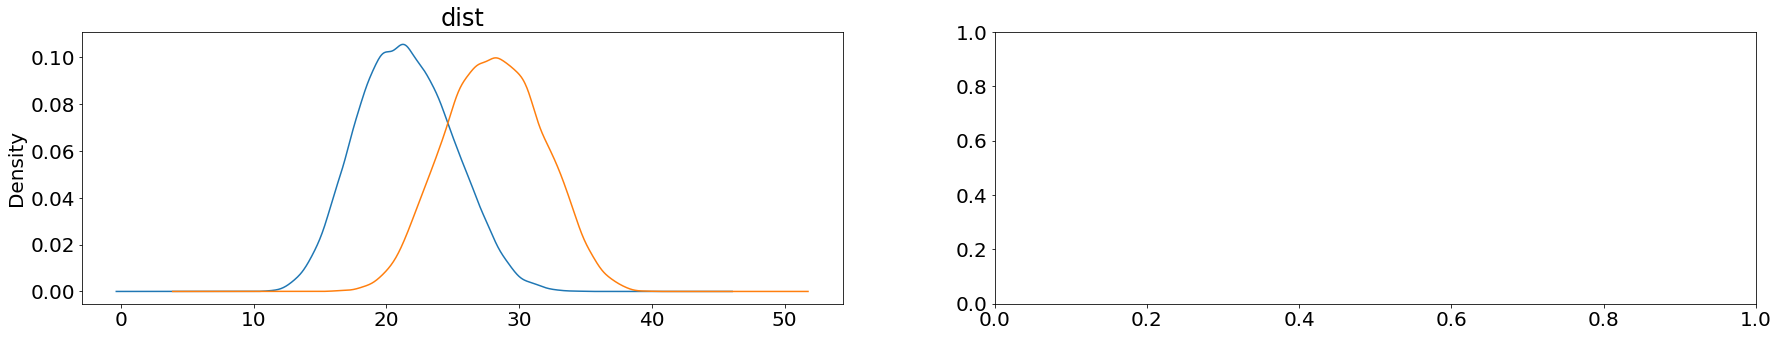

In [30]:
plot_dists(facenet_distances)

In [31]:
metrics = get_thresholds(facenet_distances)
metrics.head()

,dist_thresh,%tp,%fn,%tn,%fp,accuracy,f1_score,precision,recall
0,21.434205,51.4371,48.5629,97.0026,2.9974,0.742199,0.666135,0.944936,0.514371
1,24.980500,83.1451,16.8549,79.4626,20.5374,0.813039,0.816419,0.801920,0.831451


In [32]:
get_best_thresholds(metrics, ['accuracy', 'f1_score'])

,dist_thresh,%tp,%fn,%tn,%fp,accuracy,f1_score,precision,recall
1,24.9805,83.1451,16.8549,79.4626,20.5374,0.813039,0.816419,0.80192,0.831451


In [34]:
print(f'FaceNet mean recognition time: {facenet_distances.time.mean()}')

FaceNet mean recognition time: 0.22525297603878738


### **VGGFace**

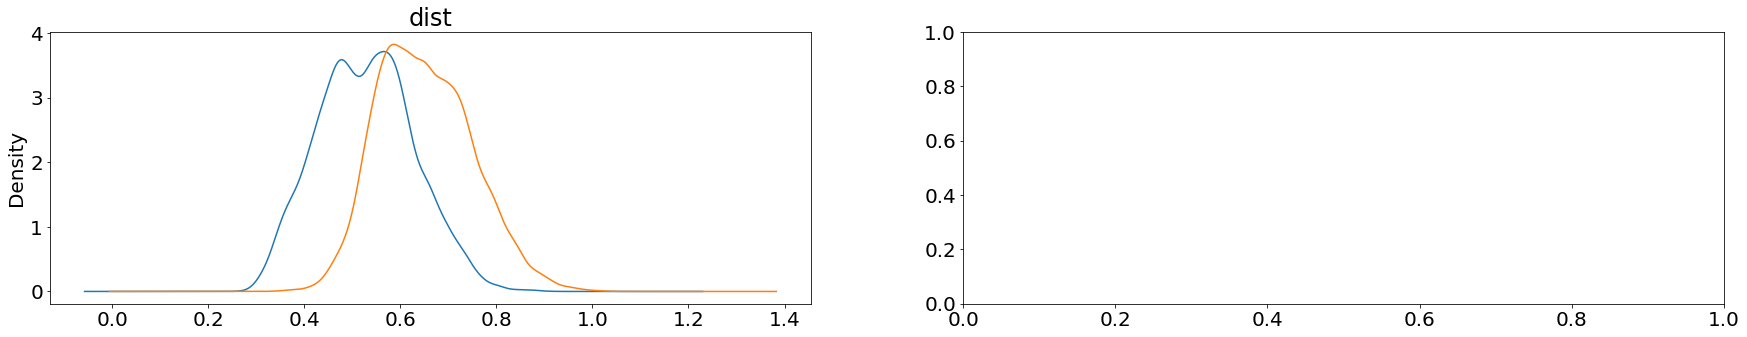

In [22]:
plot_dists(vgg_distances)

In [23]:
metrics = get_thresholds(vgg_distances)
metrics.head()

,dist_thresh,%tp,%fn,%tn,%fp,accuracy,f1_score,precision,recall
0,0.528616,50.1793,49.8207,90.7831,9.2169,0.704812,0.629617,0.844823,0.501793
1,0.628197,84.0176,15.9824,55.4461,44.5539,0.697318,0.735154,0.653470,0.840176


In [24]:
get_best_thresholds(metrics, ['accuracy', 'f1_score'])

,dist_thresh,%tp,%fn,%tn,%fp,accuracy,f1_score,precision,recall
0,0.528616,50.1793,49.8207,90.7831,9.2169,0.704812,0.629617,0.844823,0.501793


In [35]:
print(f'VGGFace mean recognition time: {vgg_distances.time.mean()}')

VGGFace mean recognition time: 0.03422939349872131
